In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/331.9 MB 4.6 MB/s eta 0:01:13
   ---------------------------------------- 2.6/331.9 MB 6.0 MB/s eta 0:00:55
    --------------------------------------- 4.2/331.9 MB 6.6 MB/s eta 0:00:50
    --------------------------------------- 6.0/331.9 MB 7.2 MB/s eta 0:00:46
    --------------------------------------- 7.1/331.9 MB 7.3 MB/s eta 0:00:45
   - -------------------------------------- 8.4/331.9 MB 6.5 MB/s eta 0:00:50
   - -------------------------------------- 10.0/331.9 MB 6.7 MB/s eta 0:00:49
   - -------------------------------------- 11.5/331.9 MB 6.8 MB/s eta 0:00:48
   - -------------------------------------- 13.4/331.9 MB 6.9 MB/s eta 0:00:46
   - -------------------------------------- 15.2/331.9 MB 7.1 MB/s eta 0:00:45
   -- ------------------------------------- 17.0/331.9 MB 7.2 MB/s eta 0:00:44
   -- ------------------------------------- 18.9/331.9 MB 7.4 MB/s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.0 which is incompatible.


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

In [11]:
print("="*60)
print("MNIST CNN Classification - Industrial Implementation")
print("="*60)
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

MNIST CNN Classification - Industrial Implementation
TensorFlow version: 2.20.0
Keras version: 3.11.3
GPU Available: False


In [13]:
print("\n1. Loading and Preprocessing MNIST Dataset...")
print("-" * 50)


1. Loading and Preprocessing MNIST Dataset...
--------------------------------------------------


In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [17]:

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [19]:
# Data preprocessing
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [25]:
# Reshape data for CNN (add channel dimension)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [27]:
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

In [29]:
print(f"\nAfter preprocessing:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_categorical shape: {y_train_categorical.shape}")
print(f"y_test_categorical shape: {y_test_categorical.shape}")


After preprocessing:
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train_categorical shape: (60000, 10)
y_test_categorical shape: (10000, 10)


Text(0.5, 0.98, 'Sample MNIST Images')

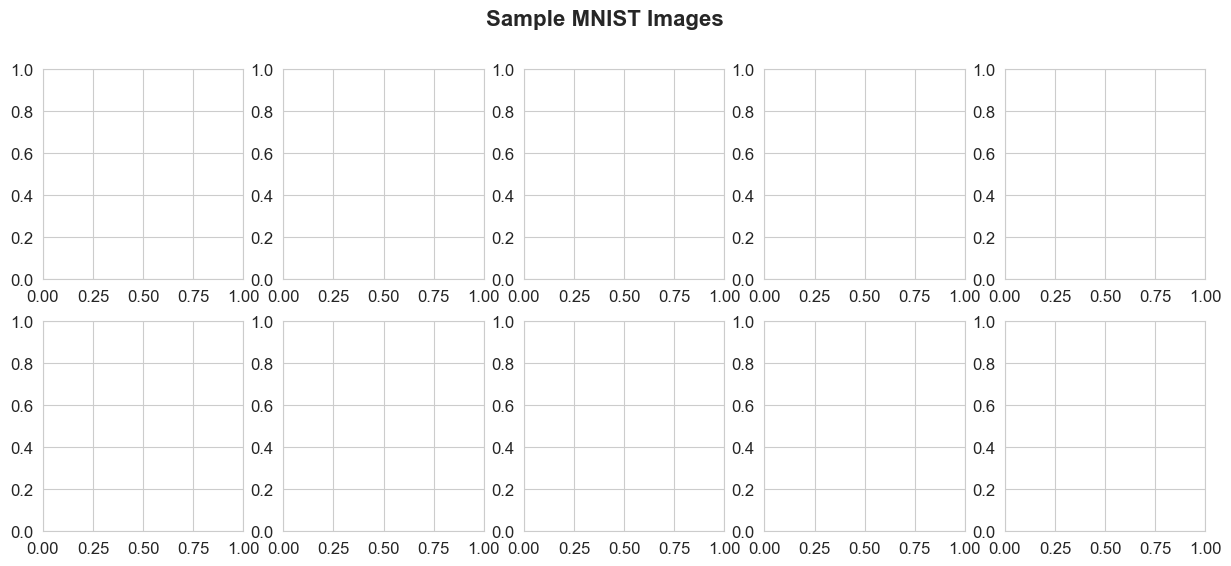

In [31]:
# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample MNIST Images', fontsize=16, fontweight='bold')

In [33]:

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}', fontweight='bold')
    axes[row, col].axis('off')

In [35]:

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

In [37]:
# Class distribution analysis
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nClass distribution in training set:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")


Class distribution in training set:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [39]:

print("\n2. Building CNN Architecture...")
print("-" * 50)


2. Building CNN Architecture...
--------------------------------------------------


In [41]:

def create_cnn_model():
    """
    Create a CNN model with the specified architecture:
    Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> 
    Flatten -> Dense -> Dropout -> Dense (output)
    """
    
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                     padding='same', name='conv2d_1'),
        layers.BatchNormalization(name='batch_norm_1'),
        layers.MaxPooling2D((2, 2), name='maxpool_1'),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_2'),
        layers.BatchNormalization(name='batch_norm_2'),
        layers.MaxPooling2D((2, 2), name='maxpool_2'),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2d_3'),
        layers.BatchNormalization(name='batch_norm_3'),
        layers.MaxPooling2D((2, 2), name='maxpool_3'),
        
        # Flatten and Dense layers
        layers.Flatten(name='flatten'),
        layers.Dense(128, activation='relu', name='dense_1'),
        layers.Dropout(0.5, name='dropout_1'),
        layers.Dense(64, activation='relu', name='dense_2'),
        layers.Dropout(0.3, name='dropout_2'),
        layers.Dense(10, activation='softmax', name='output')
    ])
    
    return model


In [43]:
# Create the model
model = create_cnn_model()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
# Display model summary
print("Model Architecture:")
print("=" * 60)
model.summary()

# Calculate total parameters
total_params = model.count_params()
print(f"\nTotal Parameters: {total_params:,}")

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,058 (976.79 KB)

 Trainable params: 249,610 (975.04 KB)

 Non-trainable params: 448 (1.75 KB)


Total Parameters: 250,058


In [47]:

print("\n3. Training the CNN Model...")
print("-" * 50)


3. Training the CNN Model...
--------------------------------------------------


In [49]:
# Define callbacks for better training
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

In [51]:
# Train the model
print("Starting training...")
history = model.fit(
    X_train, y_train_categorical,
    batch_size=128,
    epochs=20,
    validation_data=(X_test, y_test_categorical),
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")

Starting training...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 109ms/step - accuracy: 0.8728 - loss: 0.4076 - val_accuracy: 0.9520 - val_loss: 0.1737 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 118ms/step - accuracy: 0.9690 - loss: 0.1163 - val_accuracy: 0.9824 - val_loss: 0.0671 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 104ms/step - accuracy: 0.9792 - loss: 0.0789 - val_accuracy: 0.9883 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9830 - loss: 0.0660 - val_accuracy: 0.9864 - val_loss: 0.0563 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 104ms/step - accuracy: 0.9853 - loss: 0.0541 - val_accuracy: 0.9886 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - accuracy: 0.9881 - loss: 0.0442 - val_accuracy: 0.9894 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms

In [53]:

print("\n4. Evaluating Model Performance...")
print("-" * 50)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


4. Evaluating Model Performance...
--------------------------------------------------
Test Loss: 0.0350
Test Accuracy: 0.9949 (99.49%)


In [55]:
# Make predictions
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

In [57]:

# Classification report
print("\nClassification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      1.00      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




5. Visualizing Training History...
--------------------------------------------------


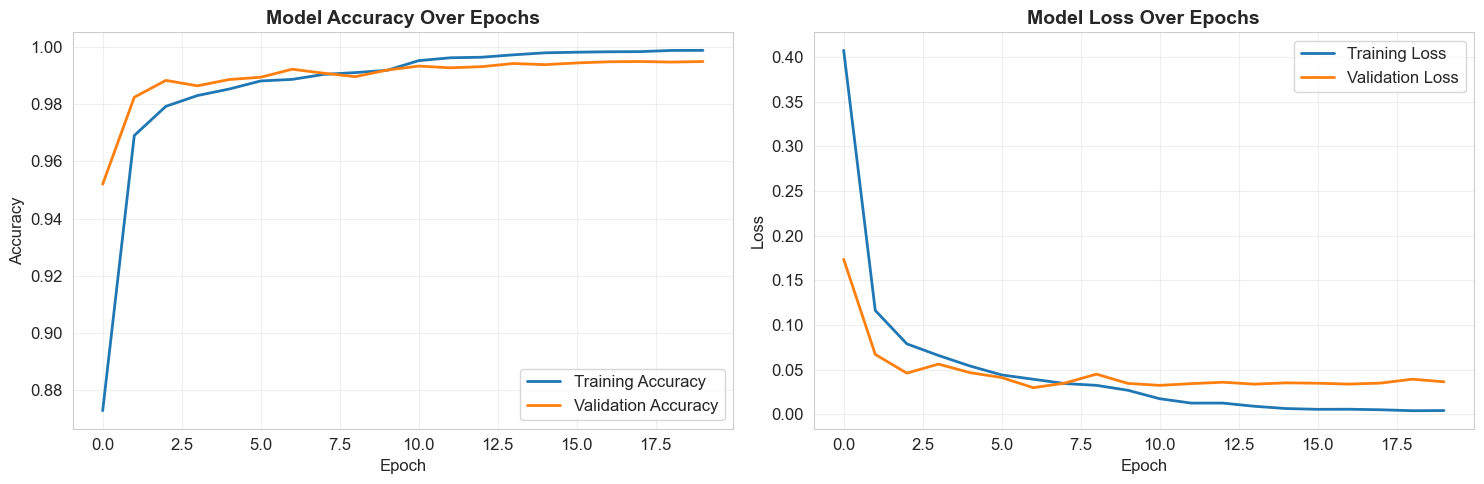

In [59]:
print("\n5. Visualizing Training History...")
print("-" * 50)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training and validation loss
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


6. Confusion Matrix Analysis...
--------------------------------------------------


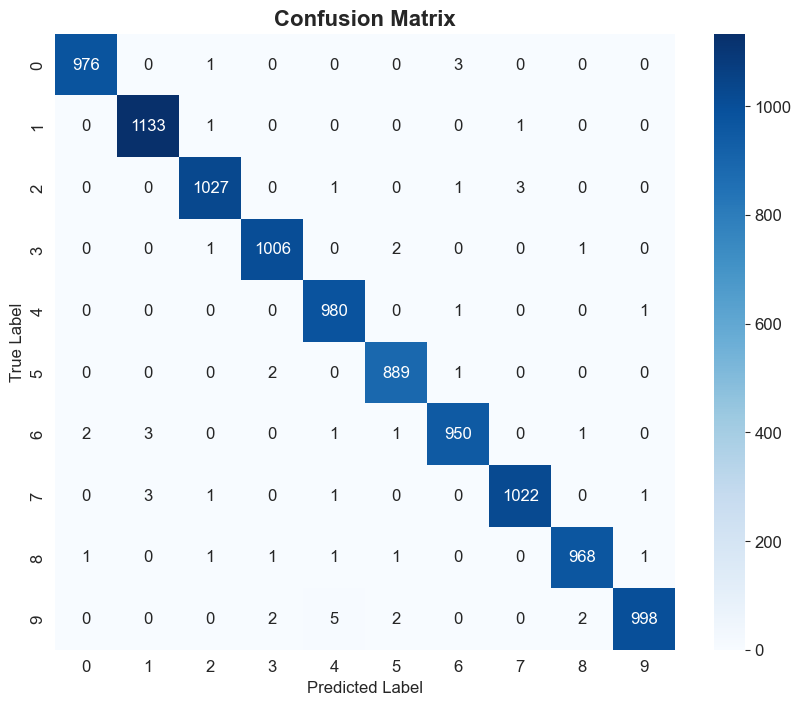

In [61]:

print("\n6. Confusion Matrix Analysis...")
print("-" * 50)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [63]:
# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for digit, accuracy in enumerate(class_accuracy):
    print(f"Digit {digit}: {accuracy:.4f} ({accuracy*100:.2f}%)")


Per-class Accuracy:
Digit 0: 0.9959 (99.59%)
Digit 1: 0.9982 (99.82%)
Digit 2: 0.9952 (99.52%)
Digit 3: 0.9960 (99.60%)
Digit 4: 0.9980 (99.80%)
Digit 5: 0.9966 (99.66%)
Digit 6: 0.9916 (99.16%)
Digit 7: 0.9942 (99.42%)
Digit 8: 0.9938 (99.38%)
Digit 9: 0.9891 (98.91%)


In [65]:
print("\n7. Sample Predictions Visualization...")
print("-" * 50)

# Select 10 random test images
np.random.seed(42)  # For reproducible results
random_indices = np.random.choice(len(X_test), 10, replace=False)



7. Sample Predictions Visualization...
--------------------------------------------------


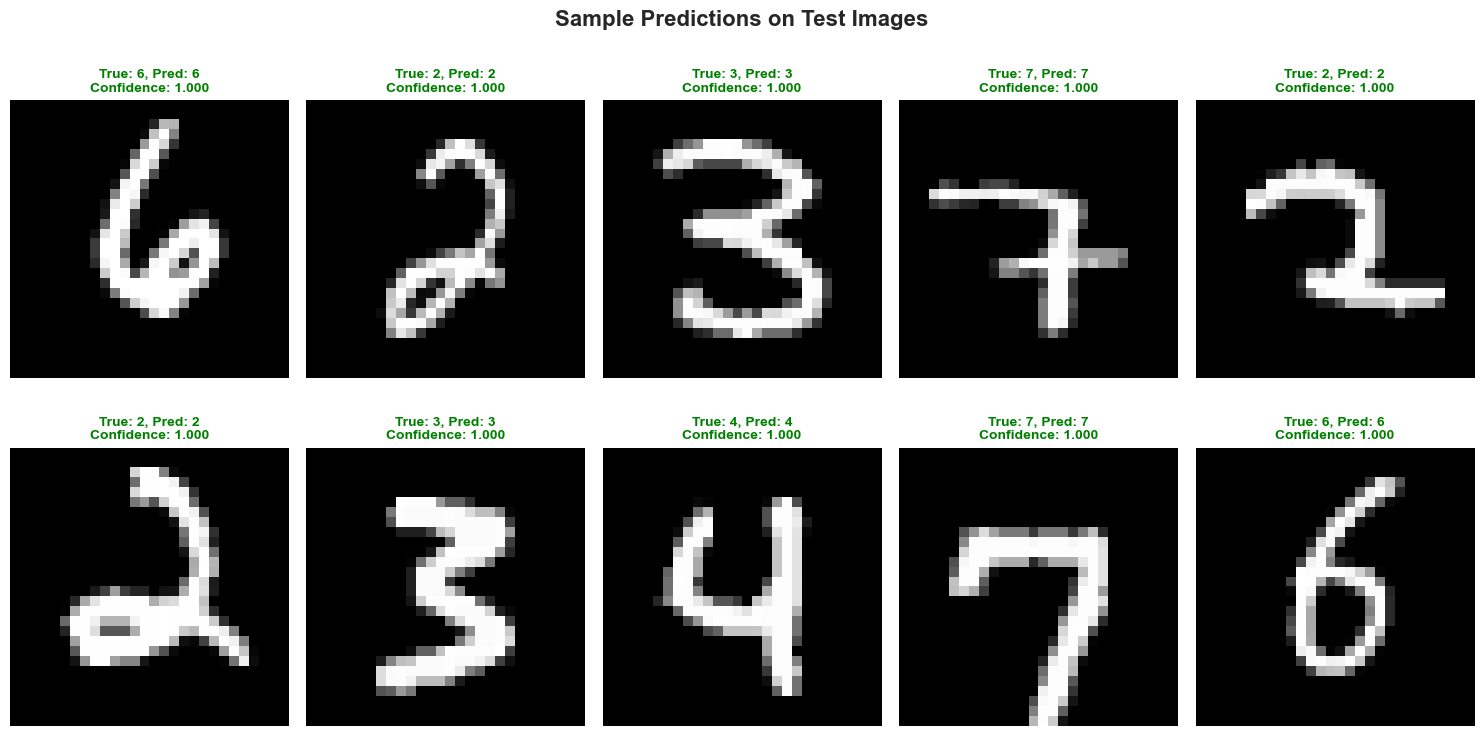

In [67]:
# Create subplot for predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Sample Predictions on Test Images', fontsize=16, fontweight='bold')

for i, idx in enumerate(random_indices):
    row = i // 5
    col = i % 5
    
    # Get image and prediction
    image = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_probs = y_pred[idx]
    pred_label = np.argmax(pred_probs)
    confidence = np.max(pred_probs)
    
    # Plot image
    axes[row, col].imshow(image, cmap='gray')
    
    # Color code: green for correct, red for incorrect
    color = 'green' if pred_label == true_label else 'red'
    title = f'True: {true_label}, Pred: {pred_label}\nConfidence: {confidence:.3f}'
    axes[row, col].set_title(title, fontweight='bold', color=color, fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [69]:

print("\n8. Detailed Prediction Analysis...")
print("-" * 50)

# Analyze prediction confidence
prediction_confidences = np.max(y_pred, axis=1)
correct_predictions = (y_pred_classes == y_test)

print(f"Average confidence for correct predictions: {prediction_confidences[correct_predictions].mean():.4f}")
print(f"Average confidence for incorrect predictions: {prediction_confidences[~correct_predictions].mean():.4f}")


8. Detailed Prediction Analysis...
--------------------------------------------------
Average confidence for correct predictions: 0.9990
Average confidence for incorrect predictions: 0.8877


In [73]:
# Find most confident incorrect predictions
incorrect_indices = np.where(~correct_predictions)[0]  # Get the actual array of indices
if len(incorrect_indices) > 0:
    most_confident_wrong = incorrect_indices[np.argmax(prediction_confidences[incorrect_indices])]
    print(f"\nMost confident incorrect prediction:")
    print(f"Index: {most_confident_wrong}")
    print(f"True label: {y_test[most_confident_wrong]}")
    print(f"Predicted label: {y_pred_classes[most_confident_wrong]}")
    print(f"Confidence: {prediction_confidences[most_confident_wrong]:.4f}")


Most confident incorrect prediction:
Index: 2130
True label: 4
Predicted label: 9
Confidence: 1.0000


In [75]:

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"✓ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"✓ Test Loss: {test_loss:.4f}")
print(f"✓ Total Parameters: {total_params:,}")
print(f"✓ Training Epochs: {len(history.history['accuracy'])}")

if test_accuracy >= 0.95:
    print("\n🎉 SUCCESS: Model achieved target accuracy of 95%+!")
else:
    print(f"\n⚠️  Model accuracy ({test_accuracy*100:.2f}%) below target of 95%")
    print("Consider: More epochs, data augmentation, or architecture changes")

print("\n" + "="*60)
print("IMPLEMENTATION COMPLETED SUCCESSFULLY")
print("="*60)



FINAL MODEL PERFORMANCE SUMMARY
✓ Test Accuracy: 0.9949 (99.49%)
✓ Test Loss: 0.0350
✓ Total Parameters: 250,058
✓ Training Epochs: 20

🎉 SUCCESS: Model achieved target accuracy of 95%+!

IMPLEMENTATION COMPLETED SUCCESSFULLY


In [79]:
# Save model
model.save('mnist_cnn_model.keras')
print("\nModel saved as 'mnist_cnn_model.keras'")


Model saved as 'mnist_cnn_model.keras'
